베이징의 미세먼지를 예측하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Downloads/PRSA_data_2010.1.1-2014.12.31.csv',index_col=0)
df.shape

(43824, 12)

In [3]:
df.isna().sum().sum() / len(df) #누락 비율

0.04716593647316539

In [4]:
data = df.dropna() #누락 데이터를 제외

In [5]:
data_one_hot = pd.get_dummies(data) #원핫 인코딩

In [6]:
data_use = data_one_hot.drop(columns=['year','month','day','hour'])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data_use) #컬럼별로 평균과 표준편차를 구하기
data_norm = scaler.transform(data_use)

In [8]:
# 지난 7일간의 기상정보(x)로 다음날의 pm2.5(y)를 예측하기
sequence = 7
len(data_norm) - sequence

41750

In [9]:
xs = []
ys = []
for i in range(len(data_norm) - sequence):    
    xs.append(data_norm[i:i+sequence, :])
    ys.append(data_norm[i+sequence, 0])#pm2.5 만 예측하면 된다

In [10]:
X = np.stack(xs, 0)
Y = np.stack(ys, 0)
X.shape, Y.shape

((41750, 7, 11), (41750,))

In [14]:
tf.reset_default_graph() # 모델 초기화
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(units=32, input_shape=(7,11)))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mse', optimizer='sgd')
#model.summary()

In [15]:
model.fit(X,Y, epochs=5, verbose=0)
p = model.predict(X)

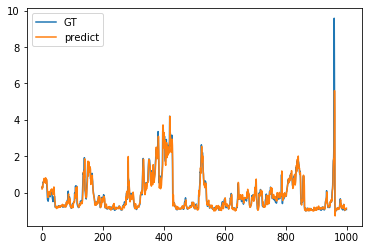

In [19]:
plt.plot(Y[:1000], label='GT')
plt.plot(p[:1000], label='predict')
plt.legend()